# The Harmonic Oscillator as we learnt at high school

<font  face=Times color=darkblue size=3> We use the example of 1D harmonic oscillator - a particle of mass $m$ attached to a string with tension $k$ - to demonstrate methods for solving classical equation of motion.

$\ddot{x}= -\frac{k}{m}x$

which gives

$\dot{v}=-\frac{k}{m}x$

$\dot{x}=-v$

The initial condition is $x(0)=1$ and $v(0)=0$.

## Different Methods

<font  face=Times color=darkblue size=3>  We show different methods to approximate the equation of 1D harmonic oscillator, while they are similar in essence.

### Euler Method

<font  face=Times color=darkblue size=3> After discretization: $t=t_n=n*\tau$
    <br>So, $$\vec x(n+1)=\vec x(n)+\tau\vec v(n)$$ $$\vec v(n+1)=\vec v(n)+\tau\vec a(n)$$
    $$E(n+1)=\frac{1}{2}kx^2+\frac{1}{2}mv^2=E(n)+\frac{1}{2}\tau^2kv(n)^2+\frac{1}{2}\tau^2\frac{k^2}{m}x(n)^2 = E(n)+\tau^2\frac{k}{m}E(n)$$
    <br> For convenience, choose k=m=1, and set x(0)=1, v(0)=0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set initial conditions
t_Eu=[0]
v_Eu=[0]
x_Eu=[1]
E_Eu=[0.5]
tau=0.03
k=1;m=1

In [4]:
# Use the iteration scheme:
for i in range(1,3000):
    t_Eu.append(tau*i)
    x_Eu.append(x_Eu[i-1]+tau*v_Eu[i-1])
    v_Eu.append(v_Eu[i-1]+tau*(-k/m)*x_Eu[i-1])
    E_Eu.append(E_Eu[i-1]+0.5*np.power(tau,2)*(np.power(v_Eu[i-1],2)+np.power(x_Eu[i-1],2)))

(-2.0, 2.0)

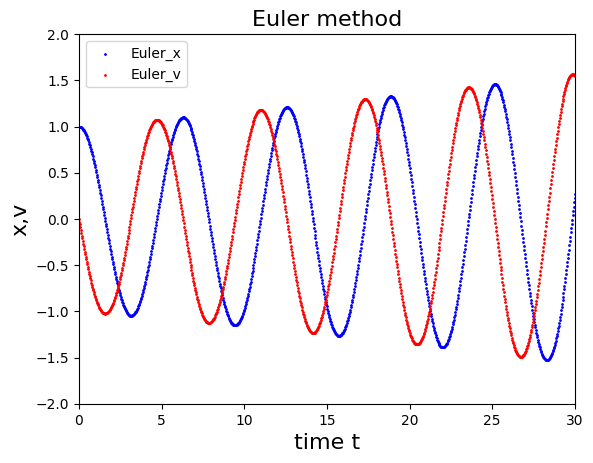

In [5]:
#postion x, velocity v plot
plt.scatter(t_Eu,x_Eu,color='blue',s=1,label='Euler_x')
plt.scatter(t_Eu,v_Eu,color='red',s=1,label='Euler_v')
plt.legend()
plt.xlabel('time t',size=16)
plt.ylabel('x,v',size=16)
plt.title('Euler method',size=16)
plt.xlim(0,30)
plt.ylim(-2,2)

(0.0, 2.0)

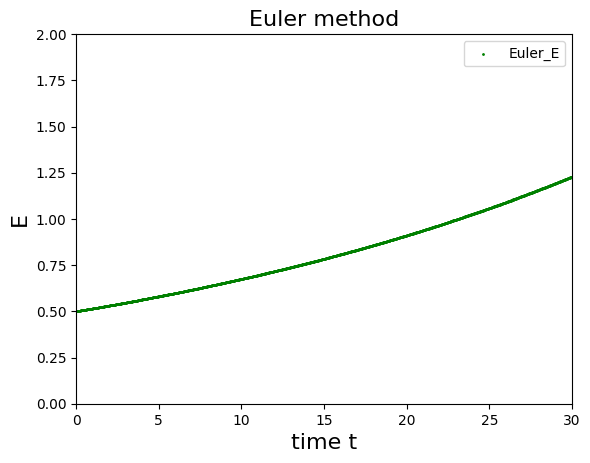

In [6]:
#Energy plot
plt.scatter(t_Eu,E_Eu,color='green',s=1,label='Euler_E')
plt.legend()
plt.xlabel('time t',size=16)
plt.ylabel('E',size=16)
plt.title('Euler method',size=16)
plt.xlim(0,30)
plt.ylim(0,2)

### Verlet Methods

<font  face=Times color=darkblue size=3> The Verlet method, use the centered 3-point formula, we get:
$$\vec x(n+1)=2\vec x(n)-\vec x(n-1)+\tau^2\vec a(n) + O(\tau^4)$$    
$$\vec v(n)=\frac{\vec x(n+1)-\vec x(n-1)}{2\tau} + O(\tau^2)$$   
and
$$\vec{x}(-1)=\vec{x}(0)-\tau\vec v(0)+\frac{\tau^2}{2}\vec a(0)$$
to start the iteration.

<font  face=Times color=darkblue size=3>
<br> Then, we can simply derive the Velocity Verlet Method from the Verlet method :
$$\vec x(n+1)=\vec x(n)+\tau\vec v(n)+\frac{1}{2}\tau^2\vec a(n)$$
$$\vec v(n+1)=\vec v(n)+\frac{1}{2}\tau(\vec a(n)+\vec a(n+1))$$
<br>which is self-starting.

<font  face=Times color=darkblue size=3>
<br> The third one is the Leap-Frog method:
$$\vec v(n+\frac{1}{2})=\vec v(n-\frac{1}{2})+\tau\vec a(n) + O(\tau^3)$$
$$\vec x(n+1) = \vec x(n) + \tau\vec v(n+\frac{1}{2})+ O(\tau^4) $$
start the iteration with $$\vec v(-\frac{1}{2})=\vec v(0) - \frac{1}{2}\tau\vec a(0)$$.

In [7]:
#initial condition
t_v=[0]
v_v=[0]
x_v=[1]
E_v=[0.5]
v_vv=[0]
x_vv=[1]
E_vv=[0.5]
v_lf=[0]   # the definition of index for x and v in leap-frog is different
x_lf=[1]
E_lf=[0.5]
t_lf=[0]  # for v

In [8]:
x_v_last=x_v[0]-tau*v_v[0]+0.5*np.power(tau,2)*(-k/m)*x_v[0]  #x(-1)
v_lf_last=v_lf[0]-0.5*tau*(-k/m)*x_lf[0]                       #v(-1/2)
for i in range(1,3000):
    t_v.append(tau*i)
    if i==1:
        x_v.append(2*x_v[i-1]-x_v_last+np.power(tau,2)*(-k/m)*x_v[i-1])
        v_v.append(0.5*(x_v[i]-x_v_last)/tau)
    else:
        x_v.append(2*x_v[i-1]-x_v[i-2]+np.power(tau,2)*(-k/m)*x_v[i-1])
        v_v.append(0.5*(x_v[i]-x_v[i-2])/tau)
    E_v.append(0.5*k*np.power(x_v[i],2)+0.5*m*np.power(v_v[i],2))

    x_vv.append(x_vv[i-1]+tau*v_vv[i-1]+0.5*np.power(tau,2)*(-k/m)*x_vv[i-1])
    v_vv.append(v_vv[i-1]+0.5*tau*(-k/m)*(x_vv[i-1]+x_vv[i]))
    E_vv.append(0.5*k*np.power(x_vv[i],2)+0.5*m*np.power(v_vv[i],2))

    if i==1:# the 1st time step, we record v(1/2),
        v_lf.append(v_lf_last+tau*(-k/m)*x_lf[i-1])
    else:  # from v(3/2)
        v_lf.append(v_lf[i-1]+tau*(-k/m)*x_lf[i-1])
    x_lf.append(x_lf[i-1]+tau*v_lf[i])
    E_lf.append(0.5*k*np.power(x_lf[i],2)+0.5*m*np.power(v_vv[i],2))  # here we have ignored the different time step for v and x
    t_lf.append((0.5+i-1)*tau)

(-2.0, 2.0)

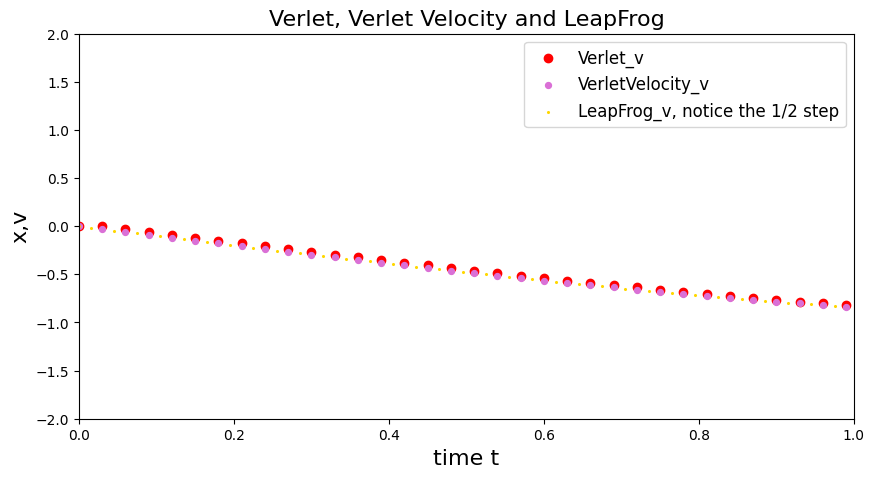

In [12]:
# velocity v plot
plt.figure(figsize=(10,5))
plt.scatter(t_v,v_v,color='red',label='Verlet_v')
plt.scatter(t_v,v_vv,color='orchid',s=18,label='VerletVelocity_v')
plt.scatter(t_lf,v_lf,color='gold',s=1.5,label='LeapFrog_v, notice the 1/2 step')
plt.legend(prop={'size': 12})
plt.xlabel('time t',size=16)
plt.ylabel('x,v',size=16)
plt.title('Verlet, Verlet Velocity and LeapFrog',size=16)
plt.xlim(0,1)
plt.ylim(-2,2)

(-2.0, 2.0)

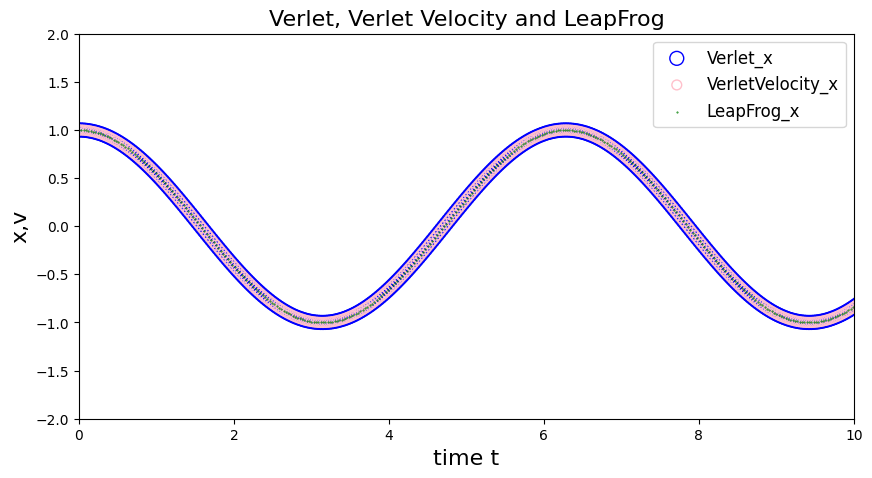

In [14]:
#postion x plot
plt.figure(figsize=(10,5))
plt.scatter(t_v,x_v,s=100,facecolors='none', edgecolors='blue',label='Verlet_x')
plt.scatter(t_v,x_vv,s=50, facecolor='none', edgecolors='pink',label='VerletVelocity_x')
plt.scatter(t_v,x_lf,color='green',s=0.2,label='LeapFrog_x')
plt.legend(prop={'size': 12})
plt.xlabel('time t',size=16)
plt.ylabel('x,v',size=16)
plt.title('Verlet, Verlet Velocity and LeapFrog',size=16)
plt.xlim(0,10)
plt.ylim(-2,2)

(0.49, 0.51)

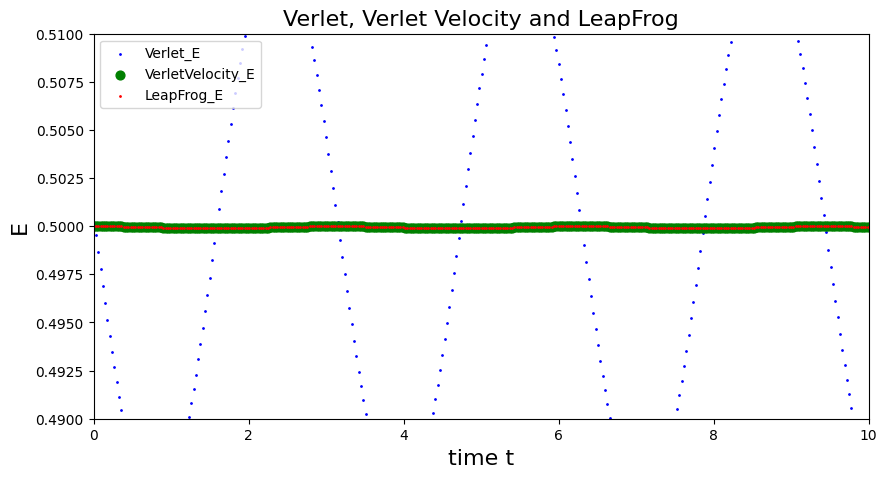

In [19]:
#Energy plot
plt.figure(figsize=(10,5))
plt.scatter(t_v,E_v,color='blue',s=1,label='Verlet_E')
plt.scatter(t_v,E_vv,color='green',s=40,label='VerletVelocity_E')
plt.scatter(t_v,E_lf,color='red',s=1,label='LeapFrog_E')
plt.legend()
plt.xlabel('time t',size=16)
plt.ylabel('E',size=16)
plt.title('Verlet, Verlet Velocity and LeapFrog',size=16)
plt.xlim(0,10)
plt.ylim(0.49,0.51)

### Runge-Kutta Methods

A general procedure to obtain higher order Runge-Kutta method is:

 $$x(t+\tau)=x(t)+\sum_{i=1}^{p}w_ik_i$$

with

$k_1=\tau f(x(t),t),$

$k_i=\tau f\lgroup x(t)+\sum_{j<i}\alpha_{ij}k_j,t+\sum_{j<i}\alpha_{ij}\tau\rgroup,i\ge2$


However, the most popular one is 4-th order Runge-Kutta method:
    \begin{equation}
    \begin{aligned}
    \\& k_1=\tau v(n)
    \\& l_1=\tau a(n)
    \\& k_2=\tau(v(n)+\frac{1}{2}l_1)
    \\& l_2=\tau a(x(n)+\frac{1}{2}k_1,v(n)+\frac{1}{2}l_1,t+\frac{1}{2}\tau)
    \\& k_3=\tau (v(n)+\frac{1}{2}l_2)
    \\& l_3=\tau a(x(n)+\frac{1}{2}k_2,v(n)+\frac{1}{2}l_2,t+\frac{1}{2}\tau)
    \\& k_4=\tau (v(n)+l_3)
    \\& l_4=\tau a(x(n)+k_3,v(n)+l_3,t+\tau)
    \end{aligned}
    \end{equation}

Put together, we have,
  $$x(n+1)=x(n)+\frac{1}{6}(k_1+2k_2+2k_3+k_4)$$
  $$v(n+1)=v(n)+\frac{1}{6}(l_1+2l_2+2l_3+l_4)$$

In [ ]:
#initial condition
t_rk=[0]
v_rk=[0]
x_rk=[1]
E_rk=[0.5]

In [ ]:
for i in range(1,3000):
    t_rk.append(tau*i)
    k1=tau*v_rk[i-1]
    l1=tau*(-k/m)*x_rk[i-1]
    k2=tau*(v_rk[i-1]+0.5*l1)
    l2=tau*(-k/m)*(x_rk[i-1]+0.5*k1)
    k3=tau*(v_rk[i-1]+0.5*l2)
    l3=tau*(-k/m)*(x_rk[i-1]+0.5*k2)
    k4=tau*(v_rk[i-1]+l3)
    l4=tau*(-k/m)*(x_rk[i-1]+k3)
    x_rk.append(x_rk[i-1]+(1/6)*(k1+2*k2+2*k3+k4))
    v_rk.append(v_rk[i-1]+(1/6)*(l1+2*l2+2*l3+l4))
    E_rk.append(0.5*k*np.power(x_rk[i],2)+0.5*m*np.power(v_rk[i],2))

### Comparison of The Methods

(-2.0, 2.0)

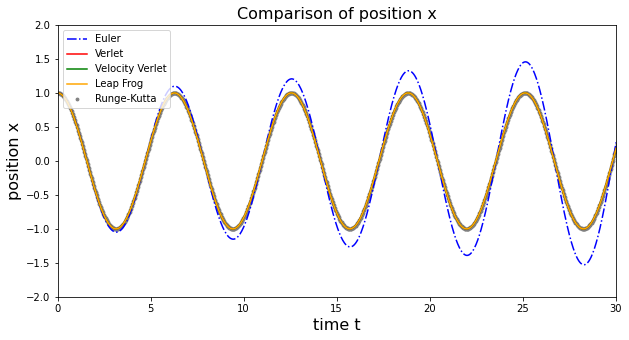

In [ ]:
#postion x plot
plt.figure(figsize=(10,5))
plt.plot(t_Eu,x_Eu,'-.',c='blue',label='Euler')
plt.plot(t_v,x_v,color='red',label='Verlet')
plt.plot(t_v,x_vv,color='green',label='Velocity Verlet')
plt.plot(t_v,x_lf,color='orange',label='Leap Frog')
plt.scatter(t_rk,x_rk,color='grey',s=8,label='Runge-Kutta')
plt.legend()
plt.xlabel('time t',size=16)
plt.ylabel('position x',size=16)
plt.title('Comparison of position x',size=16)
plt.xlim(0,30)
plt.ylim(-2,2)

(-2.0, 2.0)

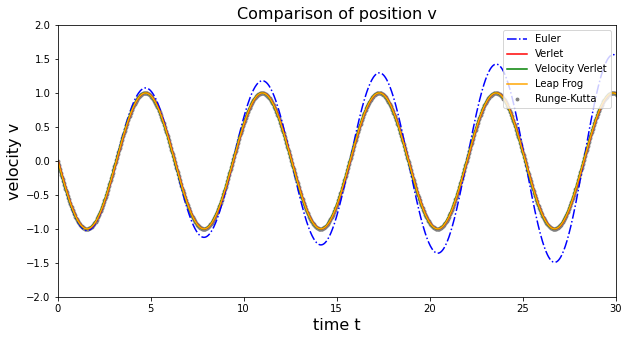

In [ ]:
#velocity v plot
plt.figure(figsize=(10,5))
plt.plot(t_Eu,v_Eu,'-.',c='blue',label='Euler')
plt.plot(t_v,v_v,color='red',label='Verlet')
plt.plot(t_v,v_vv,color='green',label='Velocity Verlet')
plt.plot(t_v,v_lf,color='orange',label='Leap Frog')
plt.scatter(t_rk,v_rk,color='grey',s=8,label='Runge-Kutta')
plt.legend()
plt.xlabel('time t',size=16)
plt.ylabel('velocity v',size=16)
plt.title('Comparison of position v',size=16)
plt.xlim(0,30)
plt.ylim(-2,2)

(0.4, 0.6)

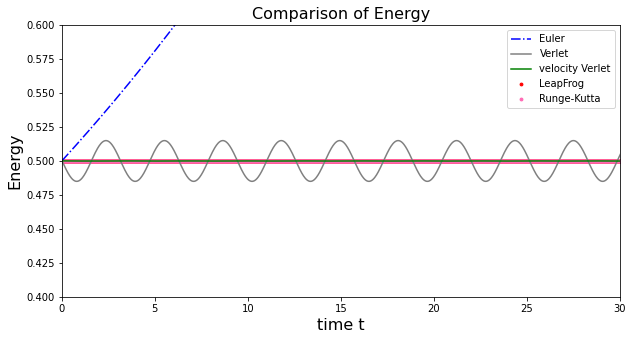

In [ ]:
#energy plot
plt.figure(figsize=(10,5))
plt.plot(t_Eu,E_Eu,'-.',c='b',label='Euler')
plt.plot(t_v,E_v,color='gray',label='Verlet')
plt.plot(t_v,E_vv,color='green',label='velocity Verlet')
plt.scatter(t_v,E_lf,s=8,color='red',label='LeapFrog')
plt.scatter(t_rk,E_rk,color='hotpink',s=8,label='Runge-Kutta')
plt.legend()
plt.xlabel('time t',size=16)
plt.ylabel('Energy',size=16)
plt.title('Comparison of Energy',size=16)
plt.xlim(0,30)
plt.ylim(0.4,0.6)

<font  face=Times color=darkblue size=3> We can see the Runge-Kutta method for a periodic motion does note have a bounded error in contrast to Verlet methods, while Euler Method seems to be the worst.